In [24]:
import numpy as np
import matplotlib.pyplot as plt

import preprocessing as prep
import visualization as vis
from filtering import LPF

In [25]:
DATA_DIR = "titan-hf-3"

SENSORS = {"b_load_1": "LC1 Axial Load",
           "pres_1": "PT1 Combustion Chamber Pressure",
           "pres_2": "PT2 Feedline Pressure",
           "pres_3": "PT3 Injector Pressure",
           "pres_4": "PT4 Ox-Tank Pressure"}

DRIVERS = {0: {"name": "Feedline", "false": "Close", "true": "Open"},
           1: {"name": "Ox Vent", "false": "Close", "true": "Open"},
           2: {"name": "Ground Vent", "false": "Open", "true": "Close"},
           5: {"name": "Ignition", "false": "Shutoff", "true": "Ignite"}}

In [ ]:
print("Processing events")
# prep.process_events(DATA_DIR, DRIVERS)
print("Processing data")
prep.process_data(DATA_DIR, SENSORS)
print("Done!")

Processing events
Processing data


In [21]:
events = prep.import_events(DATA_DIR)
print(events[52])
events = [{'secs': '7910', 'elapsed': '00:00', 'delta': '00:00', 'type': 'Ignition', 'info': ''}, {'secs': '7970', 'elapsed': '00:00', 'delta': '00:00', 'type': 'End', 'info': ''}]
labels, data = prep.import_data(DATA_DIR, events)
print(labels)
times = data[:, 0]
print(times)

print(f"HF3 Data Summary \n----------------- \n Sensors: {len(labels) - 1} \n" f" Samples: {len(times)} \n Events:  {len(events)}")

{'secs': '7910', 'elapsed': '1:35', 'delta': '131:50', 'type': 'Ignition', 'info': ''}
['Time (s)' 'LC1 Axial Load' 'PT1 Combustion Chamber Pressure'
 'PT2 Feedline Pressure' 'PT3 Injector Pressure' 'PT4 Ox-Tank Pressure']
[0.00000000e+00 3.33000000e-03 6.67000000e-03 ... 7.96999333e+03
 7.96999667e+03 7.97000000e+03]
HF3 Data Summary 
----------------- 
 Sensors: 5 
 Samples: 2391001 
 Events:  2


In [27]:
ep = vis.EventPlotter(data, events, dpi=100)
print(ep.example)
lpf = LPF(fs=300, length=101, cutoff=10, window="blackman")

example


7910.0
2373000
[-71.11742 -71.11742 -67.21442 ... -46.39743 -41.19343 -50.30092]


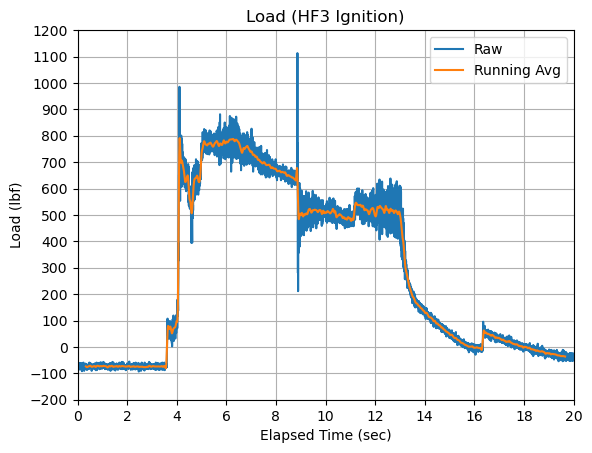

In [28]:
ep.plot(sensor_id=1, event_id=0, duration=20, filter=lpf,
        title="Load (HF3 Ignition)", ylabel="Load (lbf)",
        num_xticks=11, dif_yticks=100)

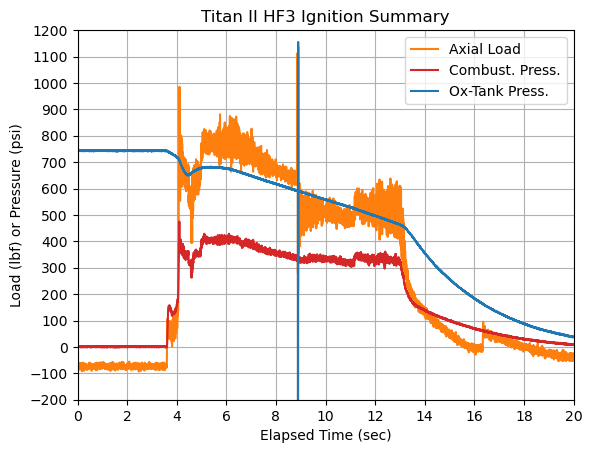

In [11]:
ep.plot(sensor_id=1, event_id=52, duration=20, filter=None,
        title="Titan II HF3 Ignition Summary", ylabel="Load (lbf) or Pressure (psi)",
        legend="Axial Load", num_xticks=11, dif_yticks=100, color="tab:orange")
ep.add_curve(sensor_id=2, event_id=52, duration=20, legend="Combust. Press.",
             color="tab:red")
ep.add_curve(sensor_id=5, event_id=52, duration=20, legend="Ox-Tank Press.", 
             color="tab:blue")
plt.show()

In [12]:
time_start = float(events[52]["secs"])
time_end = time_start + 20
sample_start = vis.nearest_sample(data, time_start)
sample_end = vis.nearest_sample(data, time_end)

times_event = [t - time_start for t in times[sample_start : sample_end]]
data_event = data[sample_start : sample_end, 1]

offset = np.mean(data_event[0:1081])

impulse_total = 0
for sample in data_event[1081:]:
    impulse_total += (sample - offset) / 300

impulse_main = 0
for sample in data_event[1081:3915]:
    impulse_main += (sample - offset) / 300

peak_thrust = max(data_event) - offset
peak_sustained_thrust = np.mean(data_event[int(300*6.25) : int(300*6.3)]) - offset
avg_thrust = impulse_main / ((3915 - 1081) / 300)

print(f"Peak Thrust:\t\t  {peak_thrust:.2f}  lbf")
print(f"Peak Sustained Thrust:\t   {peak_sustained_thrust:.2f}  lbf")
print(f"Avg Thrust @ Supersonic:   {avg_thrust:.2f}  lbf")
print(f"Impulse @ Supersonic:\t  {impulse_main:.2f}  lb-sec")
print(f"Total Impulse:\t\t  {impulse_total:.2f}  lb-sec")

Peak Thrust:		  1186.80  lbf
Peak Sustained Thrust:	   867.09  lbf
Avg Thrust @ Supersonic:   663.84  lbf
Impulse @ Supersonic:	  6271.06  lb-sec
Total Impulse:		  7104.44  lb-sec


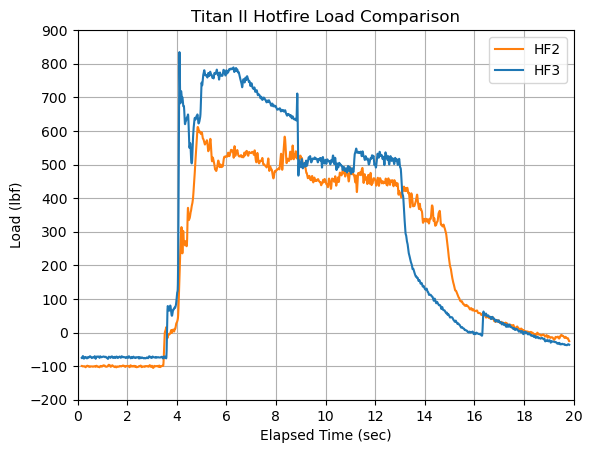

In [13]:
lpf = LPF(fs=300, length=51, cutoff=15, window="blackman")

DATA_DIR_HF2 = "titan-hf-2"
events_hf2 = prep.import_events(DATA_DIR_HF2)
label_hf2, data_hf2 = prep.import_data(DATA_DIR_HF2, events_hf2)
times_hf2 = data_hf2[:, 0]

time_start = float(events[52]["secs"])
time_end = time_start + 20
sample_start = vis.nearest_sample(data, time_start)
sample_end = vis.nearest_sample(data, time_end)
times_event = [t - time_start for t in times[sample_start:sample_end]]
data_event = data[sample_start:sample_end, 1]

time_start_hf2 = float(events_hf2[31]["secs"]) + 1
time_end_hf2 = time_start_hf2 + 20
sample_start_hf2 = vis.nearest_sample(data_hf2, time_start_hf2)
sample_end_hf2 = vis.nearest_sample(data_hf2, time_end_hf2)
times_event_hf2 = [t - time_start_hf2 for t in times_hf2[sample_start_hf2:sample_end_hf2]]
data_event_hf2 = data_hf2[sample_start_hf2:sample_end_hf2, 1]

plt.figure(dpi=100)
plt.plot(times_event_hf2[51:-51],
         lpf.apply(data_event_hf2)[51:-51],
         label="HF2", c="tab:orange")
plt.plot(times_event[51:-51],
         lpf.apply(data_event)[51:-51],
         label="HF3", c="tab:blue")
plt.legend(); plt.grid()
plt.title("Titan II Hotfire Load Comparison")
plt.xlabel("Elapsed Time (sec)"); plt.ylabel("Load (lbf)")
plt.xlim((0, 20)); plt.ylim((-200, 900))
plt.xticks(range(0, 22, 2)); plt.yticks(range(-200, 1000, 100))
plt.show()